# How can we accurately classify individuals into credit risk categories (e.g., "Poor", "Standard", "Good") based on their financial and personal information?

In [3]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv(r"C:\Users\tajud\OneDrive\Desktop\NRIT\sudents and projects\S3\Classification\Credit-Score-Data\Credit Score Data\train.csv")

In [7]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [9]:
#preprocessing
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [13]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply label encoding to all relevant categorical columns
for col in ['Occupation','Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']:
    data[col] = le.fit_transform(data[col])

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select numerical columns for scaling
numerical_cols = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Credit_History_Age',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

# Apply scaling
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [17]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,-0.958344,821000265.0,12,-0.819625,-0.744544,-0.913438,...,1,-0.533485,-1.067562,0.439200,1,-0.439448,-0.862311,2,-0.397733,0
1,5635,3392,2,Aaron Maashoh,-0.958344,821000265.0,12,-0.819625,-0.744544,-0.913438,...,1,-0.533485,-0.066489,0.449232,1,-0.439448,-0.862311,3,-0.535916,0
2,5636,3392,3,Aaron Maashoh,-0.958344,821000265.0,12,-0.819625,-0.744544,-0.913438,...,1,-0.533485,-0.718376,0.459264,1,-0.439448,-0.862311,4,-0.304920,0
3,5637,3392,4,Aaron Maashoh,-0.958344,821000265.0,12,-0.819625,-0.744544,-0.913438,...,1,-0.533485,-0.177318,0.469296,1,-0.439448,-0.862311,5,-0.839300,0
4,5638,3392,5,Aaron Maashoh,-0.958344,821000265.0,12,-0.819625,-0.744544,-0.913438,...,1,-0.533485,-1.463366,0.479328,1,-0.439448,-0.862311,1,-0.253945,0


In [19]:
columns_to_drop = [
    'ID',
    'Customer_ID',
    'SSN',
    'Name'
]
data = data.drop(columns=columns_to_drop)

In [21]:
X = data.drop('Credit_Score', axis=1) # Features
y = data['Credit_Score']   # Target

In [23]:
print(y.value_counts())

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64


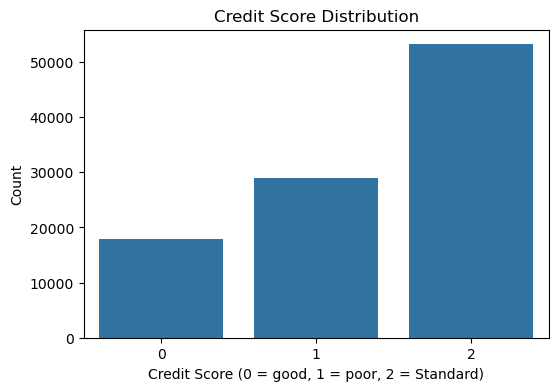

In [25]:
# plot claim status distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_Score', data=data)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score (0 = good, 1 = poor, 2 = Standard)')
plt.ylabel('Count')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)  
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)  
  
print('After SMOTE class distribution:')  
print(y_train_bal.value_counts())

After SMOTE class distribution:
Credit_Score
2    42575
0    42575
1    42575
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(max_iter=5000, solver='saga')
lr.fit(X_train_bal, y_train_bal)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, y_train_bal)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_bal, y_train_bal)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

In [ ]:
pip install xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid=params, cv=5)
grid.fit(X_train_bal, y_train_bal)

print("Best XGB Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_xgb = XGBClassifier(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    eval_metric='logloss',
    random_state=42
)

best_xgb.fit(X_train_bal, y_train_bal)
y_pred_best_xgb = best_xgb.predict(X_test)

print("✅ Final XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))
print("✅ Classification Report:\n", classification_report(y_test, y_pred_best_xgb))

In [1]:
# ANN

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical

# Build model without Flatten
model_backprop = Sequential([
    Dense(128, input_shape=(23,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: poor, standard, good
])

# Compile
model_backprop.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train (convert y to one-hot if not already)
model_backprop.fit(X_train_bal, to_categorical(y_train_bal, num_classes=3),
                   epochs=20, batch_size=64, validation_split=0.2)

# Evaluate (ensure y_test is integer labels here, not one-hot)
loss_bp, acc_bp = model_backprop.evaluate(X_test, to_categorical(y_test, num_classes=3))
print(f"✅ Backpropagation → Accuracy: {acc_bp:.4f}")

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores
model_names = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Random Forest', 'Adaboost', 'XGBoost', 'ANN']
accuracy_scores = [0.65, 0.75, 0.63, 0.74, 0.83, 0.81, 0.53]

# Add a color for each model
colors = ['skyblue', 'lightgreen', 'orange', 'salmon', 'violet', 'lightcoral', 'gold']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=colors)

# Add accuracy labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.2f}', ha='center', fontsize=12)

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0.5, 1.0)  # Adjusted to include ANN's score
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()